In [2]:
# import plotly.express as px
# import plotly
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from unet.unet import *

/home/mhtang2/.conda/envs/hackathon1.5.1/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plotly.__version__
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
# fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
# fig.show()

In [3]:
PATH_TO_MODEL = "checkpoints/detector_epoch_50.pth"
PATH_TO_TRAIN_LOSS = "checkpoints/1train_loss"
PATH_TO_VALIDATION_LOSS = "checkpoints/1validation_loss"

In [4]:
%%time
X = torch.load('data/trainX')
Y = torch.load('data/trainY')

CPU times: user 103 ms, sys: 5.56 s, total: 5.66 s
Wall time: 33.6 s


In [5]:
%%time
test_X = torch.load('data/testX')
test_Y = torch.load('data/testY')
test_X[:1].shape

CPU times: user 462 µs, sys: 313 ms, total: 313 ms
Wall time: 387 ms


torch.Size([1, 10, 39, 157, 157])

In [13]:
%%capture
model = UNet(10,2)
model.load_state_dict(torch.load(PATH_TO_MODEL,map_location='cuda:0'))
model.cuda()
model.eval()

In [ ]:
torch.isnan(X[1:2]).any()

In [10]:
START = 0
END = 1

In [14]:
%%time
with torch.no_grad():
    y_hat = model(test_X[START:END].cuda())
    print(y_hat.shape)

torch.save(y_hat, "y_hat")

torch.Size([1, 2, 39, 157, 157])
CPU times: user 634 ms, sys: 460 ms, total: 1.09 s
Wall time: 4.63 s


In [ ]:
losses = torch.load(PATH_TO_TRAIN_LOSS)
losses

In [ ]:
losses_real = torch.load("checkpoints/train_loss")
losses_real

In [8]:
loss_fn = F.mse_loss
y = test_Y[START:END].cuda()
y.shape

torch.Size([2, 2, 39, 157, 157])

In [ ]:
sqr_y = (y_hat - y)**2
sqr_y.shape

In [ ]:
sqr_loss = torch.sum(sqr_y, 0, dtype=torch.float64)
sqr_loss.shape

In [ ]:
mse_loss = torch.sum(sqr_loss, (1), dtype=torch.float64)
mse_loss.shape

In [ ]:
# Greyscale transform
to_gray = [transforms.Normalize((0.5,), (0.5,))]
to_gray = transforms.Compose(to_gray)

# Gaussian blurring
blur = [transforms.GaussianBlur(kernel_size=5, sigma=0.2)]
blur = transforms.Compose(blur)

In [ ]:
mse_loss1 = mse_loss[:1]
mse_pic1 = to_gray(mse_loss1)
mse_pic1.shape

In [ ]:
# plt.rcParams["figure.figsize"] = [6.4, 4.8]
# plt.rcParams["figure.autolayout"] = True

In [ ]:
# fig, axarr = plt.subplots(3,1)
# fig.set_size_inches(10,5)
# axarr[0].imshow(y_hat[0,0,0], interpolation='bilinear', aspect='equal')
# axarr[1].imshow(y[0,0,0], interpolation='bilinear', aspect='equal')
# axarr[2].imshow(mse_pic1[0], interpolation='nearest', aspect='equal')
# plt.savefig("z0.png", dpi=1000)

## I can't get it to be high res in this cell

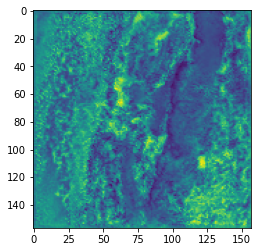

In [15]:
# Make high resolution images here:
fig = plt.imshow(y_hat[0,0,0].cpu()) # batch_size, num_channels, z
plt.savefig("y_hat.png", dpi=500)

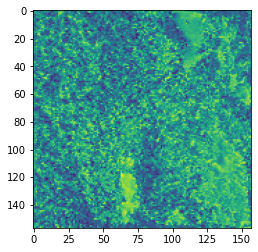

In [12]:
fig = plt.imshow(y[1,1,10].cpu())
plt.savefig("y.png", dpi=500)

In [ ]:
# Gaussian blurring on y
fig = plt.imshow(blur(y[0,0]))
plt.show()